In [1]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
#Importamos la base de datos
df = pd.read_csv(r'C:\Users\juanc\Desktop\proyecto ML\proyecto machine learning\3-Machine-Learning\Entregas\ML_project\salaries _2.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16489,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16490,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16491,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16492,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## **Análisis exploratorio de los datos**

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


In [4]:
df.info()
#No hay ningun NAN. 
#Para el analisis posterior sera necesario pasar alguna columna de obj a numerica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16494.000000,1.649400e+04,16494.000000,16494.000000
mean,2023.224991,1.637878e+05,149713.575725,32.044986
std,0.713405,3.406017e+05,68516.136918,46.260201
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.020000e+05,101517.500000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.873422e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


***Eliminamos las columnas que no nos hagan falta***


In [6]:
df = df.drop(columns=['salary_currency', 'salary'])
#la columna salary_currency, salary y salary_in_usd dice lo mismo asi que me quedo unicamente con salary_in_usd

### **Pasamos las columnas de type object a int, antes de esto analizamos cada columna si tiene mas sentido pasarlo a binario o continua**

#### 1. Columna Experiencie_level

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

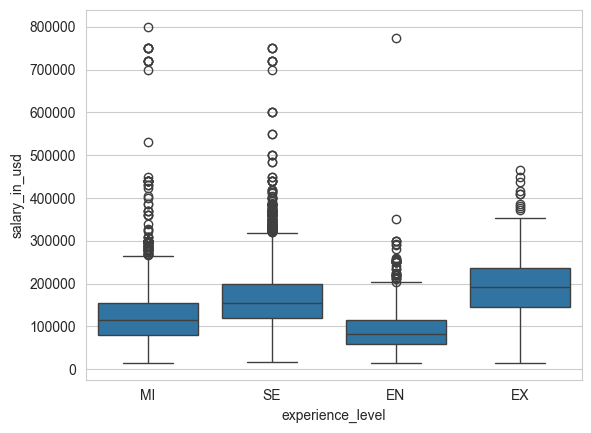

In [7]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
#en=entry, mi=middle, se=senior, ex=Executive-level / Director
#vemos que a mayor experiencia mayor sueldo por lo que tiene sentido pasarlo a una variable continua

In [8]:

df['is_outlier'] = df.groupby('experience_level').apply(lambda x: ((x['salary_in_usd'] < x['salary_in_usd'].quantile(0.25)) | (x['salary_in_usd'] > x['salary_in_usd'].quantile(0.75))).astype(int)).reset_index(level=0, drop=True)
#vemos que hay bastante outliers por lo que vamos a crear una nueva columna con indicando si son outliers o no para tratarlos de forma separada


C:\Users\juanc\AppData\Local\Temp\ipykernel_16264\2682282886.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['is_outlier'] = df.groupby('experience_level').apply(lambda x: ((x['salary_in_usd'] < x['salary_in_usd'].quantile(0.25)) | (x['salary_in_usd'] > x['salary_in_usd'].quantile(0.75))).astype(int)).reset_index(level=0, drop=True)


In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_outlier
0,2024,MI,FT,Data Scientist,120000,AU,0,AU,S,0
1,2024,MI,FT,Data Scientist,70000,AU,0,AU,S,1
2,2024,MI,CT,Data Scientist,130000,US,0,US,M,0
3,2024,MI,CT,Data Scientist,110000,US,0,US,M,0
4,2024,MI,FT,Data Science Manager,240000,US,0,US,M,1


In [10]:
count_outliers = df[df['is_outlier'] == 0]['company_location'].value_counts()
count_outliers

company_location
US    7798
CA     226
GB     209
DE      37
AU      25
FR      16
NL      10
ES       8
NZ       7
IE       6
CO       5
CH       5
PR       4
LT       4
IN       3
MX       3
PL       2
SA       2
JP       2
EG       2
SG       2
LB       2
GR       2
IL       2
BE       2
PT       2
AE       1
DZ       1
IQ       1
RU       1
BR       1
CN       1
NG       1
PH       1
AT       1
IR       1
HR       1
SE       1
MU       1
ZA       1
VN       1
MT       1
LV       1
LU       1
Name: count, dtype: int64

In [11]:
# Pasar la columna de str a int
df['experience_level'] = df['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})

C:\Users\juanc\AppData\Local\Temp\ipykernel_16264\3770702301.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience_level'] = df['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})


#### 2. Columna Company_location

In [12]:
company_location_counts =df['company_location'].value_counts()
# Identificar los paises que aparecen menos de 30 veces
company_location_remove = company_location_counts[company_location_counts < 30].index

# Eliminar las filas correspondientes a estos países, ya que estos son demasiados excasos para ser representativos
df = df[~df['company_location'].isin(company_location_remove)]
#solo nos quedamos las que almenos sean 30
#us esta sobrepresentado hay que disminuirlo
company_location_counts

company_location
US    14478
GB      694
CA      455
ES      133
DE      105
      ...  
AM        1
QA        1
AD        1
EC        1
MD        1
Name: count, Length: 77, dtype: int64

In [ ]:
# Filtrar el DataFrame para mantener solo las filas donde 'company_location' es 'US'
df = df[df['company_location'] == 'US']




In [42]:

df = df.drop(columns=['company_location'])

#### 3. Columna Employment_type

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

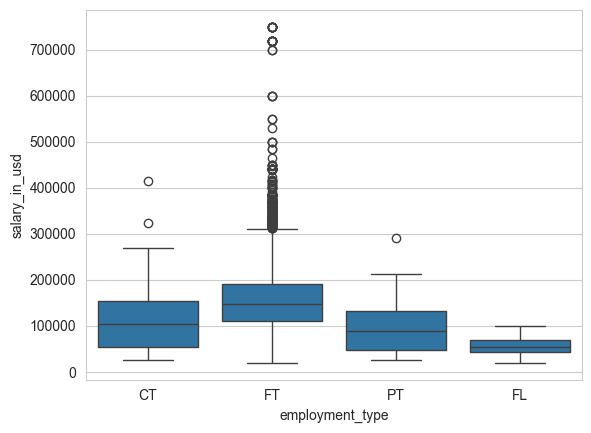

In [16]:
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
#FL=freelance, pt=part time, ct=contrato por proyecto, ft=fulltime

In [17]:
df['employment_type'].value_counts()
#Elimino todos los que no sean FT del resto hay muy pocos datos

employment_type
FT    14429
PT       26
CT       19
FL        4
Name: count, dtype: int64

In [18]:
# Especificar los valores a eliminar
employment_type_remove = ['PT', 'CT', 'FL']

# Eliminar las filas que tienen esos valores en la columna 'employment_type'
df = df.drop(df[df['employment_type'].isin(employment_type_remove)].index)

#Como solo me queda FT en la columna esta ya no me aporta informacion alguna y podemos eliminarla
df = df.drop(columns=['employment_type'])


#### 4. Columna Job_title

In [19]:
job_title_counts = df['job_title'].value_counts()
#Considero que todos los trabajos en los que tenga menos de 50 personas no hay data suficiente y el resultado puede estar muy sesgado por el azar por lo que los elimino

In [20]:
# Identificar los trabajos que aparecen menos de 50 veces
job_title_remove = job_title_counts[job_title_counts < 50].index

# Eliminar las filas correspondientes a estos países, ya que estos son demasiados excasos para ser representativos
df = df[~df['job_title'].isin(job_title_remove)]

In [21]:
df['job_title'].value_counts()
#las que tienen 50-100 counts no las eliminamos porque vemos que muchas son puestos de manager/jefe por lo que tiene sentido que haya menos pero esa informacion nos es relevante mantenerla

job_title
Data Engineer                     3075
Data Scientist                    2863
Data Analyst                      2143
Machine Learning Engineer         1506
Research Scientist                 496
Applied Scientist                  428
Data Architect                     391
Analytics Engineer                 370
Research Engineer                  279
Data Science                       248
Business Intelligence Engineer     236
Data Manager                       192
ML Engineer                        177
Business Intelligence Analyst      158
Machine Learning Scientist         116
Data Science Manager               113
Research Analyst                   111
AI Engineer                         99
Business Intelligence               96
Data Specialist                     74
BI Developer                        73
Data Science Consultant             71
Data Analytics Manager              59
Data Modeler                        50
Name: count, dtype: int64

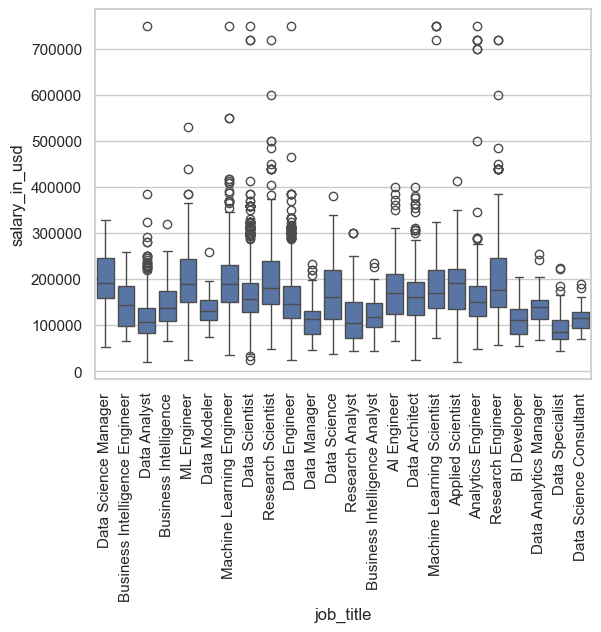

In [22]:
# Establece el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de caja
sns.boxplot(x='job_title', y='salary_in_usd', data=df)

# Rota los nombres del eje x en vertical
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()



In [23]:
df.groupby('job_title').mean('salary_in_usd')

,work_year,experience_level,salary_in_usd,remote_ratio,is_outlier
job_title,,,,,
AI Engineer,2023.626263,2.727273,173346.212121,19.191919,0.595960
Analytics Engineer,2023.218919,2.762162,163965.872973,44.189189,0.416216
Applied Scientist,2023.264019,2.703271,190896.334112,25.934579,0.507009
BI Developer,2023.260274,2.452055,113973.109589,28.767123,0.493151
Business Intelligence,2024.000000,2.666667,143816.677083,29.166667,0.364583
Business Intelligence Analyst,2023.582278,2.189873,121916.436709,34.177215,0.373418
Business Intelligence Engineer,2023.338983,2.864407,143317.707627,22.881356,0.665254
Data Analyst,2023.238917,2.362109,112006.359776,36.934204,0.477368
Data Analytics Manager,2023.135593,2.322034,138081.474576,23.728814,0.322034


In [24]:
df = pd.get_dummies(df, columns=['job_title'])
#creamos de variables dummy


#### 5. Columna Employee_residence

In [25]:
# Cuenta los valores en los que las columnas company_location y employee_residence no coinciden
mismatch_count = (df['company_location'] != df['employee_residence']).sum()
mismatch_count
#casi todo el mundo vive donde trabaja, por lo cual la informacion esta repetida y puedo cargarme una columna

24

In [26]:
df = df.drop(columns=['employee_residence'])

#### 6. Columna remote_ratio

In [27]:
df['remote_ratio'].value_counts()


remote_ratio
0      9275
100    4121
50       28
Name: count, dtype: int64

#### 7. Columna Company_size

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

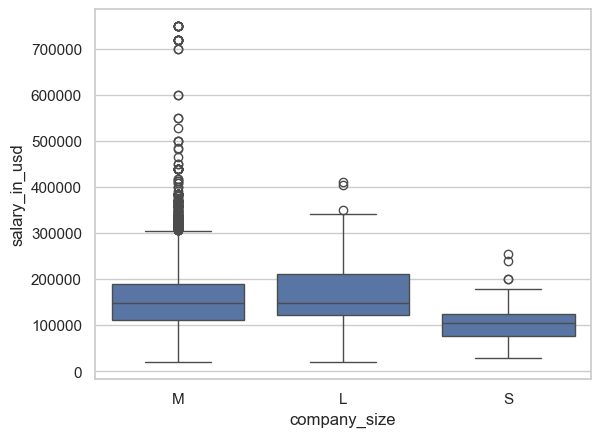

In [28]:
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
#s=small, M=middle, L=large
#vemos que las empresas pequeñas se cobra menos pero entre mediana y grande apenas hay diferencia

In [29]:
df.groupby('company_size').mean('salary_in_usd')

,work_year,experience_level,salary_in_usd,remote_ratio,is_outlier,job_title_AI Engineer,job_title_Analytics Engineer,job_title_Applied Scientist,job_title_BI Developer,job_title_Business Intelligence,...,job_title_Data Science Consultant,job_title_Data Science Manager,job_title_Data Scientist,job_title_Data Specialist,job_title_ML Engineer,job_title_Machine Learning Engineer,job_title_Machine Learning Scientist,job_title_Research Analyst,job_title_Research Engineer,job_title_Research Scientist
company_size,,,,,,,,,,,,,,,,,,,,,
L,2022.904011,2.597421,164268.504298,18.839542,0.535817,0.000000,0.002865,0.353868,0.001433,0.002865,...,0.001433,0.015759,0.124642,0.005731,0.010029,0.054441,0.004298,0.005731,0.002865,0.057307
M,2023.284813,2.673001,157139.890790,31.323924,0.454502,0.007727,0.028939,0.014272,0.005677,0.007412,...,0.005441,0.008043,0.218026,0.005520,0.013326,0.115203,0.008437,0.008358,0.021842,0.035878
S,2021.863636,2.090909,107733.181818,70.454545,0.522727,0.022727,0.022727,0.000000,0.000000,0.000000,...,0.022727,0.000000,0.250000,0.000000,0.022727,0.159091,0.136364,0.022727,0.000000,0.022727


In [30]:
# Pasar la columna de str a int
df['company_size'] = df['company_size'].replace({'S': 1, 'M': 2, 'L': 2})

C:\Users\juanc\AppData\Local\Temp\ipykernel_16264\69041577.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['company_size'] = df['company_size'].replace({'S': 1, 'M': 2, 'L': 2})


### **Una vez que hemos limpiado la data vamos a ver la relaciones entre las variables**

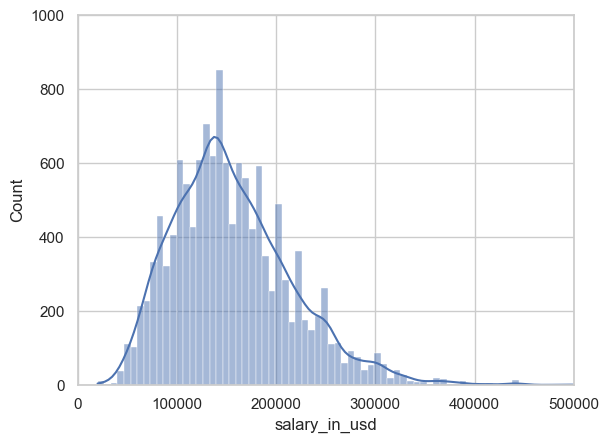

In [31]:
# Crear el histograma con Seaborn
sns.histplot(df['salary_in_usd'], kde=True)

# Ajustar la escala del eje x y el eje y (opcional)
plt.xlim(0, 500000)  # Ajustar los valores según el rango de tus datos
plt.ylim(0, 1000)     # Ajustar los valores según el rango de tus datos

# Mostrar el gráfico
plt.show()

#vemos que la targer salary tiene una distribucion mas o menos normal, por lo que estaria ok para nuestro modelo



<Axes: xlabel='work_year', ylabel='salary_in_usd'>

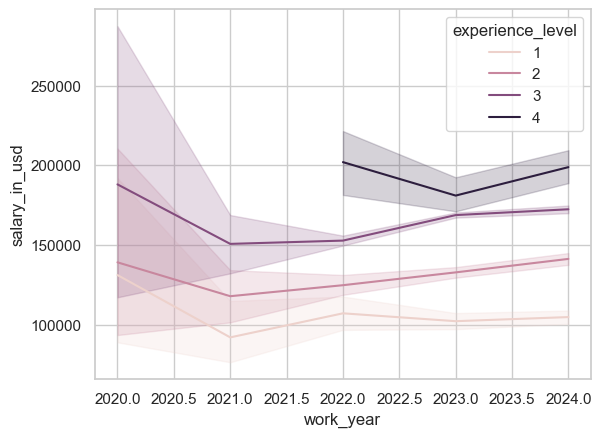

In [32]:
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='experience_level')
#tendencia alcista en los salarios segun transcurren los años da igual tu nivel de experiencia




In [33]:
df.head()


,work_year,experience_level,salary_in_usd,remote_ratio,company_location,company_size,is_outlier,job_title_AI Engineer,job_title_Analytics Engineer,job_title_Applied Scientist,...,job_title_Data Science Consultant,job_title_Data Science Manager,job_title_Data Scientist,job_title_Data Specialist,job_title_ML Engineer,job_title_Machine Learning Engineer,job_title_Machine Learning Scientist,job_title_Research Analyst,job_title_Research Engineer,job_title_Research Scientist
4,2024,2,240000,0,US,2,1,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,2024,2,180000,0,US,2,1,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,2024,3,202800,0,US,2,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2024,3,115000,0,US,2,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,2024,2,112300,0,US,2,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


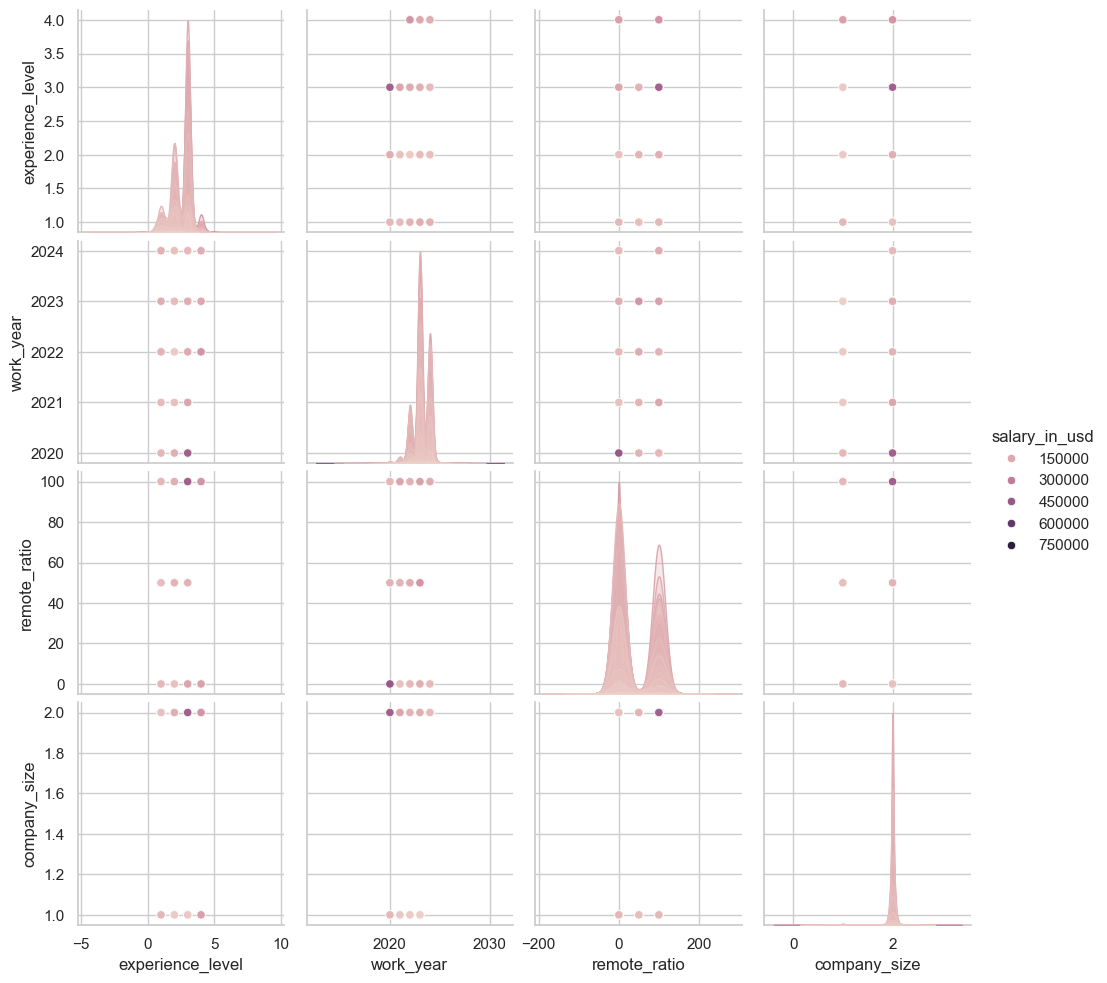

In [35]:
# Especificar las columnas que deseas incluir en el pairplot
columnas_a_incluir = ['experience_level', 'work_year','remote_ratio','company_size']

# Crear el pairplot con las columnas seleccionadas
sns.pairplot(df, vars=columnas_a_incluir, hue="salary_in_usd")

# Mostrar el gráfico
plt.show()



<Axes: >

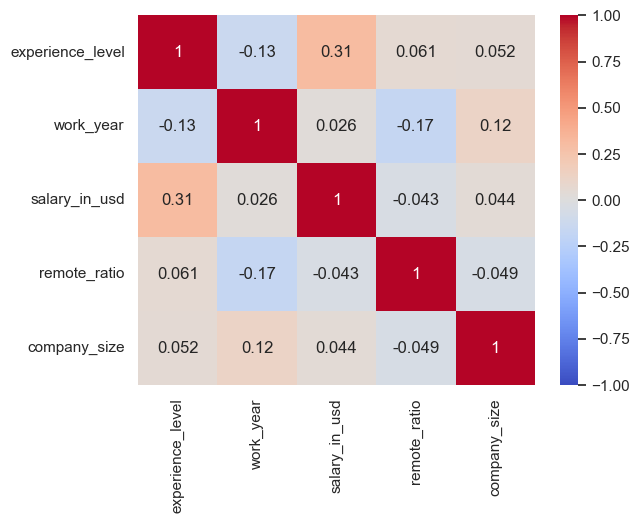

In [36]:
# Especificar las columnas que deseas incluir en la matriz de correlación
columnas_a_incluir = ['experience_level', 'work_year', 'salary_in_usd', 'remote_ratio', 'company_size']

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
df_filtrado = df[columnas_a_incluir]

# Calcular la matriz de correlación
matriz_correlacion = df_filtrado.corr()

# Crear el heatmap con la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

#vemos que apenas hay correlacion lineal entre las variables, solo un poco entre años de experiencia y la ubicacion de la compañia


In [44]:


# Calcula la matriz de correlación entre todas las columnas 
df.corr()



,work_year,experience_level,salary_in_usd,remote_ratio,company_size,is_outlier,job_title_AI Engineer,job_title_Analytics Engineer,job_title_Applied Scientist,job_title_BI Developer,...,job_title_Data Science Consultant,job_title_Data Science Manager,job_title_Data Scientist,job_title_Data Specialist,job_title_ML Engineer,job_title_Machine Learning Engineer,job_title_Machine Learning Scientist,job_title_Research Analyst,job_title_Research Engineer,job_title_Research Scientist
work_year,1.000000,-0.133863,0.026247,-0.167866,0.122200,0.035342,0.048119,-0.010643,0.001014,-0.000009,...,0.003941,-0.055258,-0.038399,-0.009619,0.006892,0.020133,0.002209,0.039033,0.036935,0.039081
experience_level,-0.133863,1.000000,0.306054,0.061370,0.051707,0.016750,0.008107,0.025026,0.010253,-0.024888,...,0.018692,0.014813,0.040951,-0.049385,0.015238,0.092058,0.012101,-0.131363,-0.021357,-0.010451
salary_in_usd,0.026247,0.306054,1.000000,-0.042552,0.043704,0.211212,0.021181,0.017113,0.093516,-0.049267,...,-0.046567,0.062194,0.044531,-0.070764,0.076593,0.209670,0.053868,-0.055978,0.093864,0.116632
remote_ratio,-0.167866,0.061370,-0.042552,1.000000,-0.049312,-0.065577,-0.021704,0.048874,-0.019160,-0.003265,...,-0.028665,0.018907,0.035538,-0.014824,0.003510,-0.051391,0.001341,-0.011045,-0.069010,-0.055910
company_size,0.122200,0.051707,0.043704,-0.049312,1.000000,-0.007339,-0.010290,0.001694,0.010407,0.004240,...,-0.013787,0.005284,-0.005141,0.004269,-0.004797,-0.008523,-0.079134,-0.009156,0.008354,0.004323
is_outlier,0.035342,0.016750,0.211212,-0.065577,-0.007339,1.000000,0.023698,-0.014439,0.017501,0.005074,...,0.011159,0.032951,-0.054373,0.020266,0.016729,0.034965,-0.000385,0.006696,0.028243,0.032776
job_title_AI Engineer,0.048119,0.008107,0.021181,-0.021704,-0.010290,0.023698,1.000000,-0.014512,-0.015642,-0.006374,...,-0.006285,-0.007942,-0.044879,-0.006417,-0.009963,-0.030640,-0.008047,-0.007871,-0.012558,-0.016883
job_title_Analytics Engineer,-0.010643,0.025026,0.017113,0.048874,0.001694,-0.014439,-0.014512,1.000000,-0.030552,-0.012449,...,-0.012276,-0.015512,-0.087657,-0.012534,-0.019461,-0.059847,-0.015718,-0.015373,-0.024527,-0.032976
job_title_Applied Scientist,0.001014,0.010253,0.093516,-0.019160,0.010407,0.017501,-0.015642,-0.030552,1.000000,-0.013419,...,-0.013233,-0.016721,-0.094488,-0.013511,-0.020977,-0.064510,-0.016943,-0.016571,-0.026439,-0.035546
job_title_BI Developer,-0.000009,-0.024888,-0.049267,-0.003265,0.004240,0.005074,-0.006374,-0.012449,-0.013419,1.000000,...,-0.005392,-0.006813,-0.038500,-0.005505,-0.008547,-0.026285,-0.006904,-0.006752,-0.010773,-0.014484


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2857 entries, 13812 to 16478
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   work_year                                2857 non-null   int64
 1   experience_level                         2857 non-null   int64
 2   salary_in_usd                            2857 non-null   int64
 3   remote_ratio                             2857 non-null   int64
 4   company_location                         2857 non-null   int64
 5   company_size                             2857 non-null   int64
 6   is_outlier                               2857 non-null   int32
 7   job_title_Analytics Engineer             2857 non-null   bool 
 8   job_title_Applied Scientist              2857 non-null   bool 
 9   job_title_Business Intelligence Analyst  2857 non-null   bool 
 10  job_title_Data Analyst                   2857 non-null   bool 
 11  job_

In [40]:
!pip install xgboost

In [45]:
import xgboost

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import 
from xgboost import XGBRegressor

SyntaxError: invalid syntax (1346443695.py, line 4)

In [47]:
# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

In [48]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

### **XGBoost**

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# XGBoost
from xgboost import XGBRegressor

# Crear y ajustar el modelo XGBoost
xgboost_model = XGBRegressor(n_estimators=100, random_state=0)
xgboost_model.fit(X, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train = mean_absolute_error(y, xgboost_model.predict(X))
print(f"Mean Absolute Error on Training Set: {mae_train}")

# Calcular el error absoluto medio en porcentaje
mae_train_percentage = (mae_train / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Percentage): {mae_train_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
xgboost_mae_scores = -cross_val_score(xgboost_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv = xgboost_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation: {mean_mae_cv}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_percentage = (mean_mae_cv / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Percentage): {mean_mae_cv_percentage:.2f}%")



Mean Absolute Error on Training Set: 32369.398379883976
Mean Absolute Error on Training Set (Percentage): 20.57%
Mean Absolute Error with Cross Validation: 34619.26119708801
Mean Absolute Error with Cross Validation (Percentage): 22.00%


### **RandomForest**

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear y ajustar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_rf = mean_absolute_error(y, rf_model.predict(X))
print(f"Mean Absolute Error on Training Set (Random Forest): {mae_train_rf}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_rf_percentage = (mae_train_rf / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Random Forest, Percentage): {mae_train_rf_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
rf_mae_scores = -cross_val_score(rf_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_rf = rf_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation (Random Forest): {mean_mae_cv_rf}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_rf_percentage = (mean_mae_cv_rf / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Random Forest, Percentage): {mean_mae_cv_rf_percentage:.2f}%")



Mean Absolute Error on Training Set (Random Forest): 32379.833391127435
Mean Absolute Error on Training Set (Random Forest, Percentage): 20.58%
Mean Absolute Error with Cross Validation (Random Forest): 34558.79556941895
Mean Absolute Error with Cross Validation (Random Forest, Percentage): 21.96%


### **Regresion Lineal**

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear y ajustar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_linear = mean_absolute_error(y, linear_model.predict(X))
print(f"Mean Absolute Error on Training Set (Linear Regression): {mae_train_linear}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_linear_percentage = (mae_train_linear / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Linear Regression, Percentage): {mae_train_linear_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
linear_mae_scores = -cross_val_score(linear_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_linear = linear_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation (Linear Regression): {mean_mae_cv_linear}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_linear_percentage = (mean_mae_cv_linear / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Linear Regression, Percentage): {mean_mae_cv_linear_percentage:.2f}%")


Mean Absolute Error on Training Set (Linear Regression): 39936.48373412434
Mean Absolute Error on Training Set (Linear Regression, Percentage): 25.38%
Mean Absolute Error with Cross Validation (Linear Regression): 40166.74329742589
Mean Absolute Error with Cross Validation (Linear Regression, Percentage): 25.53%


### **Polinomica 2**

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear características polinómicas de grado 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Crear y ajustar un modelo de regresión lineal
linear_model_poly_degree_2 = LinearRegression()
linear_model_poly_degree_2.fit(X_poly, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_linear_poly_degree_2 = mean_absolute_error(y, linear_model_poly_degree_2.predict(X_poly))
print(f"Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2): {mae_train_linear_poly_degree_2}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_linear_poly_degree_2_percentage = (mae_train_linear_poly_degree_2 / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2, Percentage): {mae_train_linear_poly_degree_2_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
linear_poly_mae_scores_degree_2 = -cross_val_score(linear_model_poly_degree_2, X_poly, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_linear_poly_degree_2 = linear_poly_mae_scores_degree_2.mean()
print(f"Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2): {mean_mae_cv_linear_poly_degree_2}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_linear_poly_degree_2_percentage = (mean_mae_cv_linear_poly_degree_2 / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2, Percentage): {mean_mae_cv_linear_poly_degree_2_percentage:.2f}%")


Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2): 34092.73859656323
Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2, Percentage): 21.67%
Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2): 40255.51639061122
Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2, Percentage): 25.58%
